<a href="https://colab.research.google.com/github/springboardmentor891v/CreditPathAI_Oct_Batch/blob/sowmya/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')
print("All Libraries imported!!")

All Libraries imported!!


In [3]:
from google.colab import files
uploaded = files.upload()


Saving Loan_Default.csv to Loan_Default.csv


In [4]:
#loading dataset
import pandas as pd
df = pd.read_csv("Loan_Default.csv")
print("First 5 rows in dataset: ")
print(df.head())
print("\nInformation of dataset: ")
df.info()


First 5 rows in dataset: 
      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP     

In [5]:
#missing values in every col
print("Missing values in every column: ")
print(df.isnull().sum())

Missing values in every column: 
ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                   

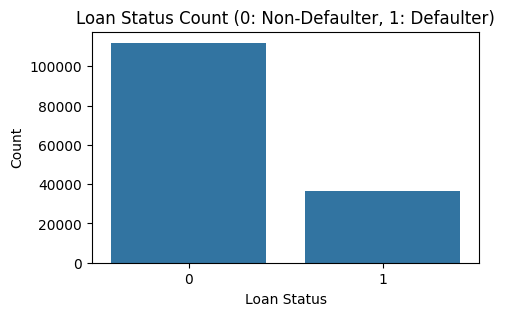

Loan Count: 
Status
0    112031
1     36639
Name: count, dtype: int64
Loan Proportion: 
Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64


In [6]:
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,3))
sns.countplot(x = 'Status', data = df)
plt.title('Loan Status Count (0: Non-Defaulter, 1: Defaulter)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()
#printing
print("Loan Count: ")
print(df['Status'].value_counts())
print("Loan Proportion: ")
print(df['Status'].value_counts(normalize=True)*100)

In [7]:
df.drop('ID', axis=1, inplace = True)
print("ID column is dropped ")

ID column is dropped 


In [8]:
#categorical col
categorical_col = df.select_dtypes(
    include=['object']).columns
print(f"Categorical columns:  {list(categorical_col)}")

#one hot encoding
df_encoded=pd.get_dummies(df,columns=categorical_col,drop_first=True)
print("dataframe after onehot encoding: ",df_encoded.shape)
print("First 5 rows: ")
print(df_encoded.head())

Categorical columns:  ['loan_limit', 'Gender', 'approv_in_adv', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'open_credit', 'business_or_commercial', 'Neg_ammortization', 'interest_only', 'lump_sum_payment', 'construction_type', 'occupancy_type', 'Secured_by', 'total_units', 'credit_type', 'co-applicant_credit_type', 'age', 'submission_of_application', 'Region', 'Security_Type']
dataframe after onehot encoding:  (148670, 50)
First 5 rows: 
   year  loan_amount  rate_of_interest  Interest_rate_spread  Upfront_charges  \
0  2019       116500               NaN                   NaN              NaN   
1  2019       206500               NaN                   NaN              NaN   
2  2019       406500              4.56                0.2000            595.0   
3  2019       456500              4.25                0.6810              NaN   
4  2019       696500              4.00                0.3042              0.0   

    term  property_value   income  Credit_Score        LTV  ... 

In [9]:
x = df_encoded.drop('Status',axis=1)
y = df_encoded['Status']
print("(x) shape:",x.shape)
print("(y) shape:",y.shape)

(x) shape: (148670, 49)
(y) shape: (148670,)


In [10]:
#training & testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (118936, 49)
X_test shape: (29734, 49)


In [11]:
# Fix Missing Values

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# apply scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Applied Imputer + Scaling")


Applied Imputer + Scaling


In [12]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Applied feature scaling")


 Applied feature scaling


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight='balanced'),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC( kernel='linear',        # linear is MUCH faster than rbf
    max_iter=500,          # limits training time
    probability=True,
    class_weight='balanced',
    random_state=42
),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(n_estimators=200, class_weight='balanced'),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

In [14]:
# Model training

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier()
}

results = {}
roc_values = {}

for name, model in models.items():

    print("\n=========================")
    print(f" MODEL: {name}")
    print("===========================")

    # Training
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results[name] = acc
    roc_values[name] = auc

    print(f"{name} Accuracy: {acc * 100:.2f}%")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    print(cm)



 MODEL: Logistic Regression
Logistic Regression Accuracy: 87.44%

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92     22406
           1       0.93      0.53      0.68      7328

    accuracy                           0.87     29734
   macro avg       0.90      0.76      0.80     29734
weighted avg       0.88      0.87      0.86     29734

Confusion Matrix:
[[22117   289]
 [ 3445  3883]]

 MODEL: Naive Bayes
Naive Bayes Accuracy: 87.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     22406
           1       1.00      0.48      0.65      7328

    accuracy                           0.87     29734
   macro avg       0.93      0.74      0.79     29734
weighted avg       0.89      0.87      0.85     29734

Confusion Matrix:
[[22406     0]
 [ 3804  3524]]

 MODEL: Decision Tree
Decision Tree Accuracy: 100.00%

Classification Report:
     

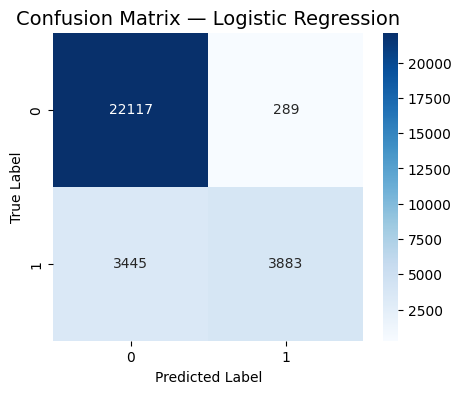

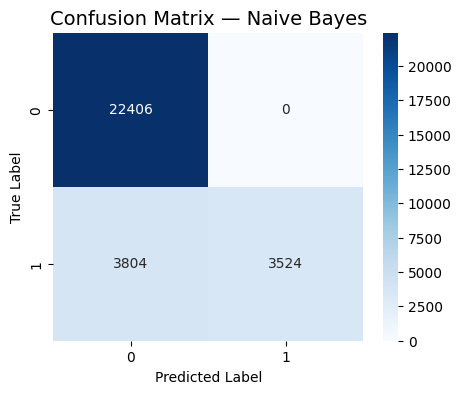

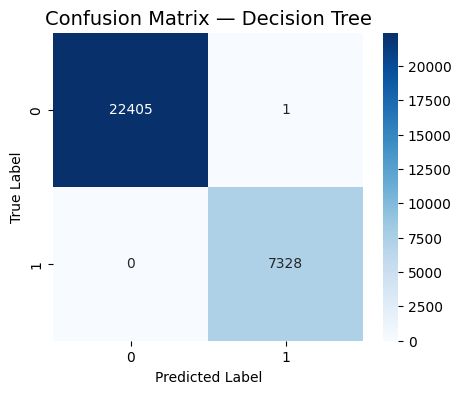

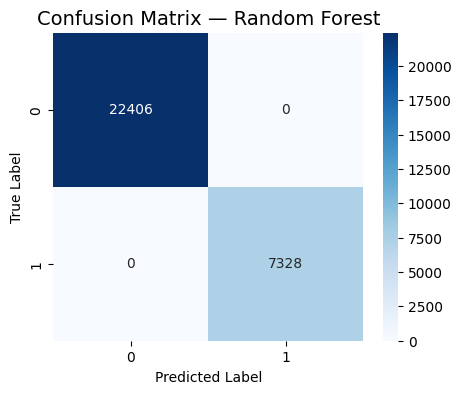

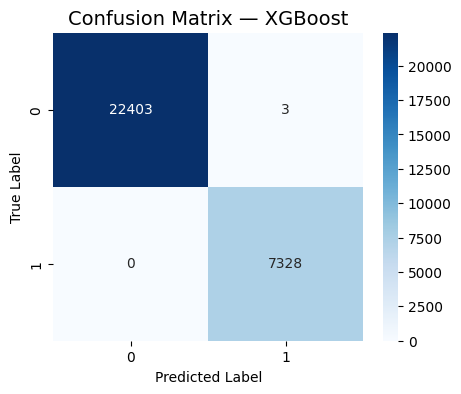

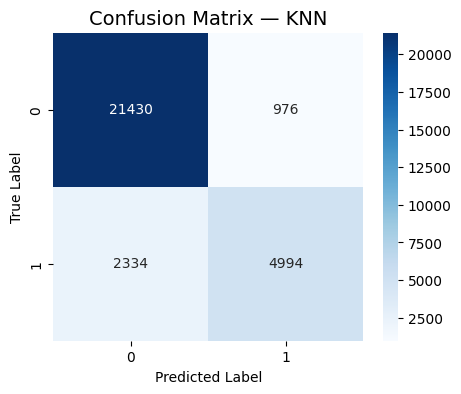

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# confusion matrix heatmaps
for name, model in models.items():

    # Predict
    y_pred = model.predict(X_test_scaled)

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plotting
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix — {name}", fontsize=14)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


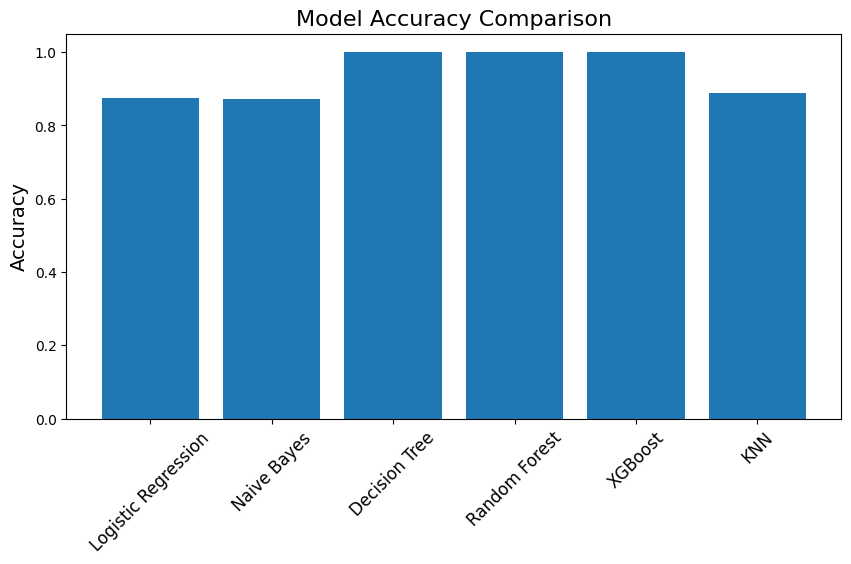

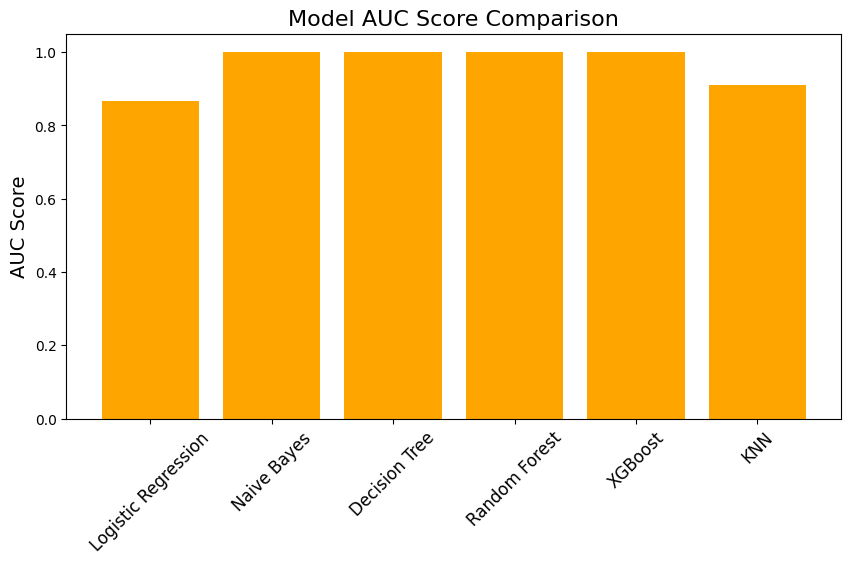

In [16]:
import matplotlib.pyplot as plt

# ---------- Accuracy Graph ----------
plt.figure(figsize=(10,5))
plt.bar(results.keys(), results.values())
plt.title("Model Accuracy Comparison", fontsize=16)
plt.ylabel("Accuracy", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

# ---------- AUC Graph ----------
plt.figure(figsize=(10,5))
plt.bar(roc_values.keys(), roc_values.values(), color='orange')
plt.title("Model AUC Score Comparison", fontsize=16)
plt.ylabel("AUC Score", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()


In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

final_results = []

for name, model in models.items():

    # TRAIN predictions
    y_train_pred = model.predict(X_train_scaled)
    y_train_proba = model.predict_proba(X_train_scaled)[:, 1]

    # TEST predictions
    y_test_pred = model.predict(X_test_scaled)
    y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

    # TRAIN metrics
    train_acc = accuracy_score(y_train, y_train_pred)
    train_prec = precision_score(y_train, y_train_pred)
    train_rec = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_proba)

    # TEST metrics
    test_acc = accuracy_score(y_test, y_test_pred)
    test_prec = precision_score(y_test, y_test_pred)
    test_rec = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_proba)

    # append row
    final_results.append([
        name,
        train_acc, train_prec, train_rec, train_f1, train_auc,
        test_acc, test_prec, test_rec, test_f1, test_auc
    ])

# Create DataFrame
columns = [
    "Model",
    "Train Accuracy", "Train Precision", "Train Recall", "Train F1", "Train AUC",
    "Test Accuracy", "Test Precision", "Test Recall", "Test F1", "Test AUC"
]

results_df = pd.DataFrame(final_results, columns=columns)

print("=== RESULTS TABLE ===")
display(results_df)


=== RESULTS TABLE ===


,Model,Train Accuracy,Train Precision,Train Recall,Train F1,Train AUC,Test Accuracy,Test Precision,Test Recall,Test F1,Test AUC
0,Logistic Regression,0.869266,0.924701,0.511139,0.658361,0.861524,0.874420,0.930729,0.529885,0.675304,0.865805
1,Naive Bayes,0.866996,1.000000,0.460305,0.630423,0.999983,0.872066,1.000000,0.480895,0.649466,1.000000
2,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,0.999966,0.999864,1.000000,0.999932,0.999978
3,Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,XGBoost,1.000000,1.000000,1.000000,1.000000,1.000000,0.999899,0.999591,1.000000,0.999795,0.999997
5,KNN,0.922378,0.909658,0.760568,0.828459,0.970529,0.888680,0.836516,0.681496,0.751090,0.910983
